Mounted at /content/drive


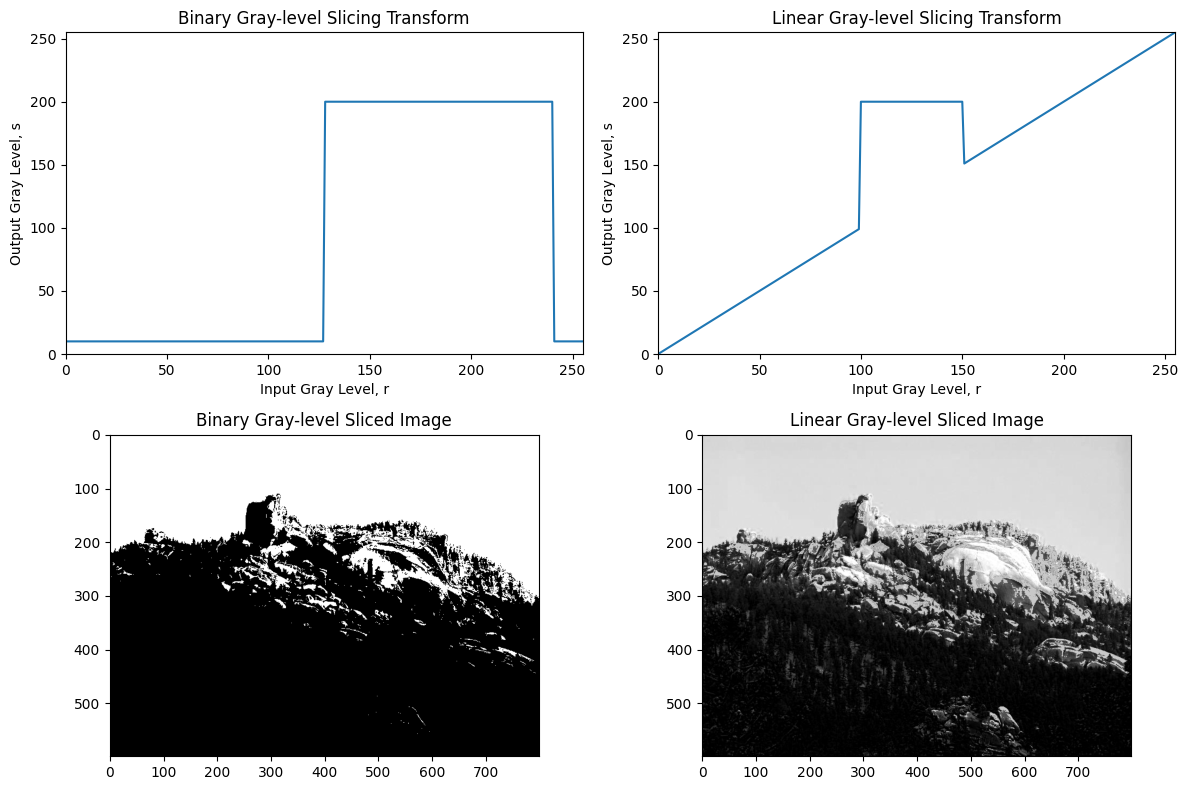

In [ ]:
# add original image for display

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Read image
main_img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/HE1.jpg", cv2.IMREAD_GRAYSCALE)

# Create copies for binary and linear scaling
img1 = main_img.copy()
img2 = main_img.copy()

# Define thresholds
binary_low = 128
binary_high = 240
linear_low = 100
linear_high = 150

# Binary slicing
img1[main_img < binary_low] = 10
img1[main_img > binary_high] = 10
img1[(main_img >= binary_low) & (main_img <= binary_high)] = 200

# Linear slicing
img2[main_img < linear_low] = main_img[main_img < linear_low]
img2[main_img > linear_high] = main_img[main_img > linear_high]
img2[(main_img >= linear_low) & (main_img <= linear_high)] = 200

# Plot transformation functions (x and y not required for functionality)
x = range(256)
y1 = [10] * 256
y1[binary_low:binary_high + 1] = [200] * (binary_high - binary_low + 1)
y2 = list(x)
y2[linear_low:linear_high + 1] = [200] * (linear_high - linear_low + 1)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title('Binary Gray-level Slicing Transform')
plt.axis([0, 255, 0, 255])
plt.xlabel('Input Gray Level, r')
plt.ylabel('Output Gray Level, s')

plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title('Linear Gray-level Slicing Transform')
plt.axis([0, 255, 0, 255])
plt.xlabel('Input Gray Level, r')
plt.ylabel('Output Gray Level, s')

plt.subplot(2, 2, 3)
plt.imshow(img1, cmap="gray")
plt.title('Binary Gray-level Sliced Image')

plt.subplot(2, 2, 4)
plt.imshow(img2, cmap="gray")
plt.title('Linear Gray-level Sliced Image')

plt.tight_layout()
plt.show()



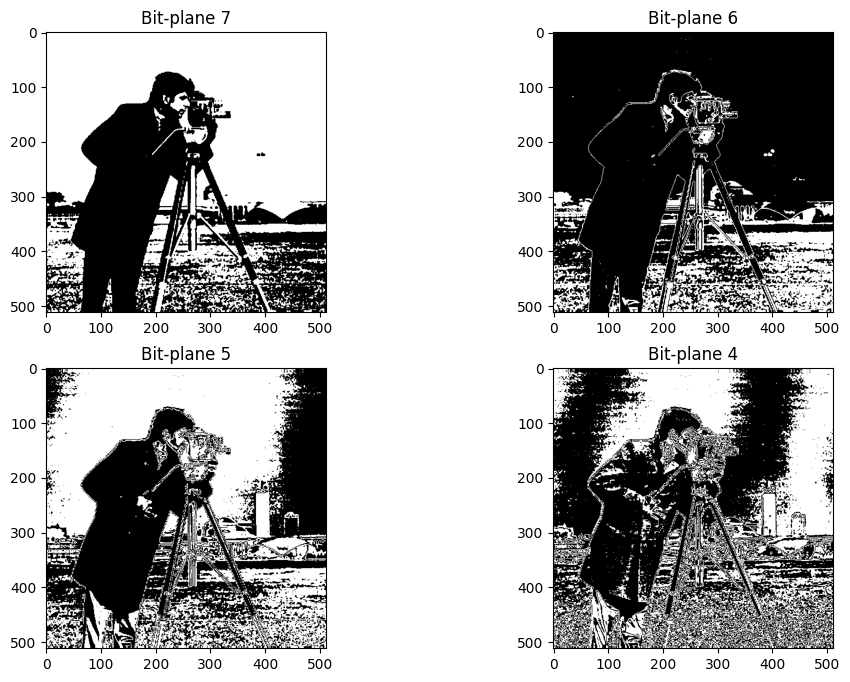

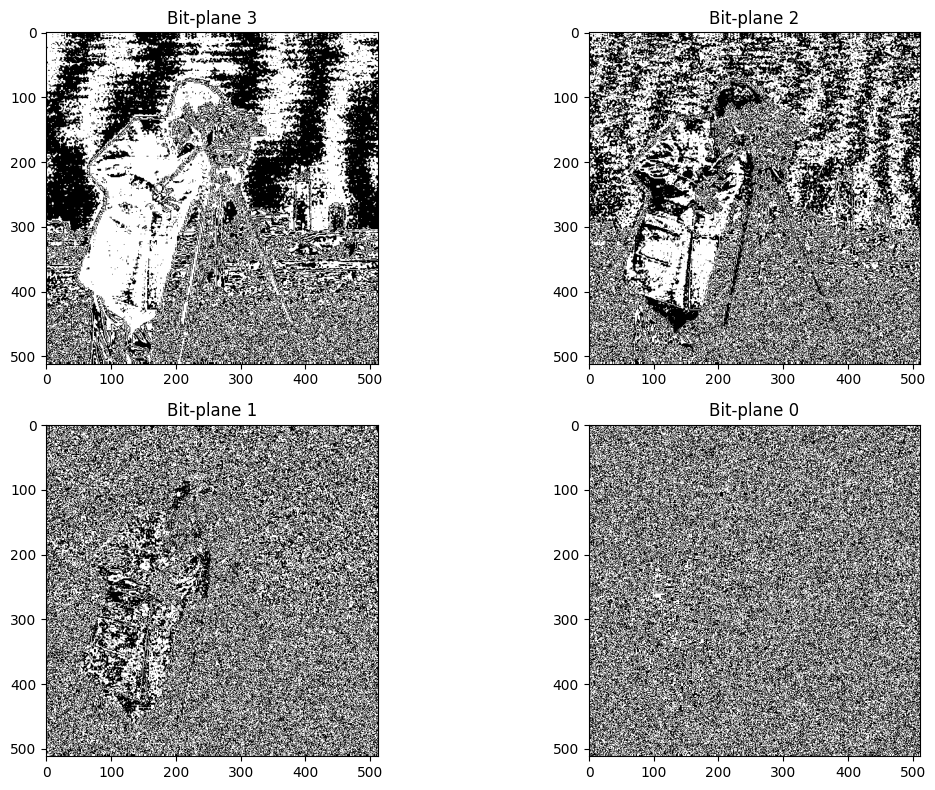

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Camera_man.bmp", cv2.IMREAD_GRAYSCALE)

# Create copies for each bit plane using a loop
bit_planes = []
for _ in range(8):
    bit_planes.append(img.copy())

# Extract bit planes using bitwise AND
bit_masks = [128, 64, 32, 16, 8, 4, 2, 1]

for i, mask in enumerate(bit_masks):
    # Convert mask to a NumPy array with the same shape as the image
    mask_int = np.full(img.shape, mask).astype(np.uint8)
    # Extract bit plane using bitwise AND
    bit_planes[i] = cv2.bitwise_and(img, mask_int).astype(np.uint8)

# Extract specific bit plane combinations
img76 = cv2.bitwise_and(img, 0b11000000).astype(np.uint8)
img765 = cv2.bitwise_and(img, 0b11100000).astype(np.uint8)
img7654 = cv2.bitwise_and(img, 0b11110000).astype(np.uint8)

# Plot bit planes
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(bit_planes[0], cmap="gray")
plt.title('Bit-plane 7')

plt.subplot(2, 2, 2)
plt.imshow(bit_planes[1], cmap="gray")
plt.title('Bit-plane 6')

plt.subplot(2, 2, 3)
plt.imshow(bit_planes[2], cmap="gray")
plt.title('Bit-plane 5')

plt.subplot(2, 2, 4)
plt.imshow(bit_planes[3], cmap="gray")
plt.title('Bit-plane 4')

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(bit_planes[4], cmap="gray")
plt.title('Bit-plane 3')

plt.subplot(2, 2, 2)
plt.imshow(bit_planes[5], cmap="gray")
plt.title('Bit-plane 2')

plt.subplot(2, 2, 3)
plt.imshow(bit_planes[6], cmap="gray")
plt.title('Bit-plane 1')

plt.subplot(2, 2, 4)
plt.imshow(bit_planes[7], cmap="gray")
plt.title('Bit-plane 0')

plt.tight_layout()
plt.show()


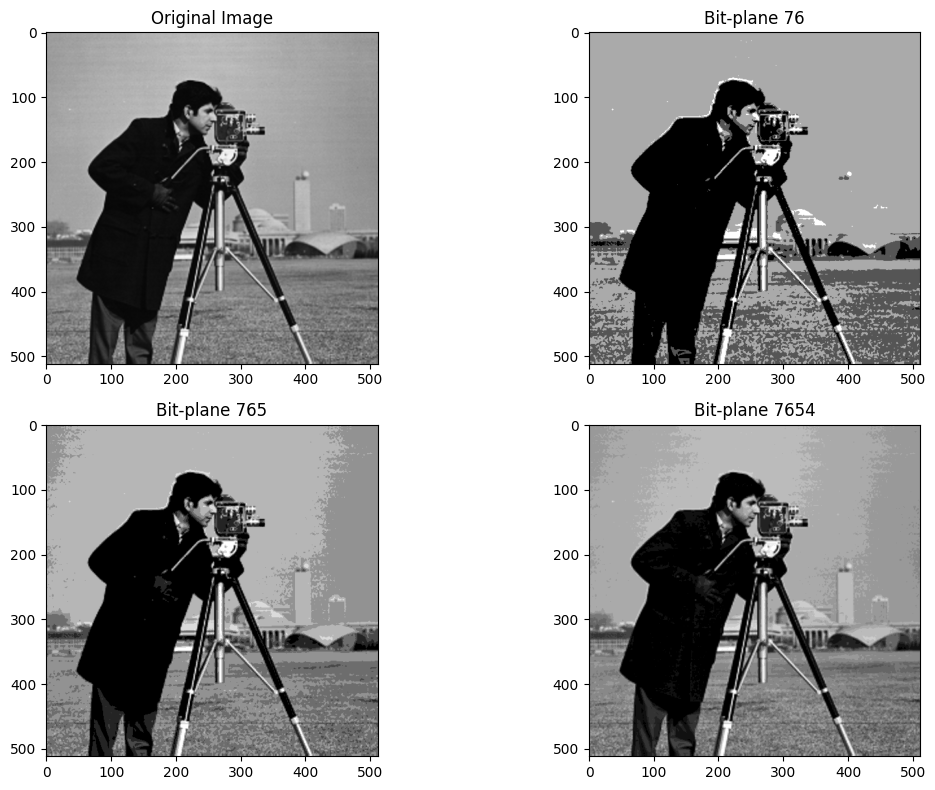

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(img76, cmap="gray")
plt.title('Bit-plane 76')

plt.subplot(2, 2, 3)
plt.imshow(img765, cmap="gray")
plt.title('Bit-plane 765')

plt.subplot(2, 2, 4)
plt.imshow(img7654, cmap="gray")
plt.title('Bit-plane 7654')

plt.tight_layout()
plt.show()

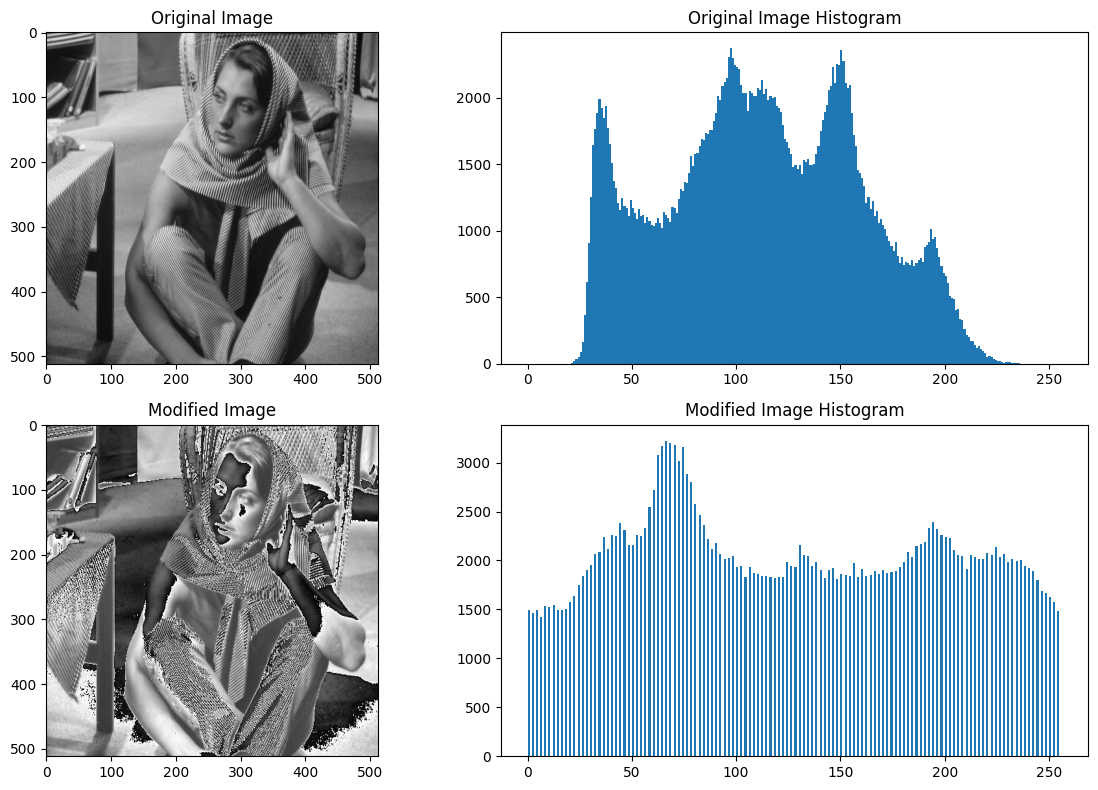

In [ ]:
# Operations list
ops = ['rcontrast']

# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Barbara.bmp", cv2.IMREAD_GRAYSCALE)
modified_img = img.copy()  # Create a copy for modification

# Loop through operations
for op in ops:
    if op == "invert":
        modified_img = 255 - modified_img

    elif op == "darken":
        # Adjust value to avoid going below 0 (overflow)
        modified_img = np.clip(modified_img - 64, 0, 255)

    elif op == "lighten":
        # Adjust value to avoid going above 255 (overflow)
        modified_img = np.clip(modified_img + 64, 0, 255)

    elif op == "rcontrast":
        modified_img = modified_img * 2

    elif op == "lcontrast":
        modified_img = modified_img // 2  # Integer division for contrast reduction

# Plot original and modified images with histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Original Image Histogram')

plt.subplot(2, 2, 3)
plt.imshow(modified_img, cmap="gray")
plt.title('Modified Image')
plt.subplot(2, 2, 4)
plt.hist(modified_img.ravel(), bins=256, range=(0, 256))
plt.title('Modified Image Histogram')

plt.tight_layout()
plt.show()


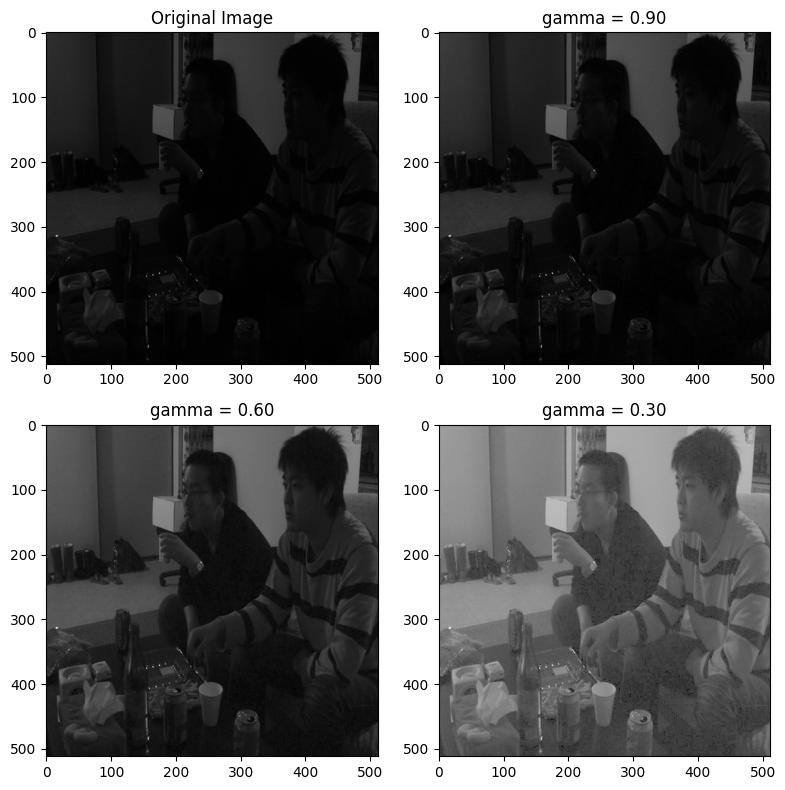

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/HE2.jpg")

# Gamma values
gammas = [0.9, 0.6, 0.3]

# Plot original image
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img[:, :, ::-1])  # OpenCV uses BGR, convert to RGB for display
plt.title('Original Image')

# Apply gamma correction and normalization for each gamma value
for n, gamma in enumerate(gammas):
    # Convert image to float for calculations (avoid overflow)
    img2 = img.astype(np.float32)
    # Apply gamma correction
    img2 = img2 ** gamma

    # Normalize to range [0, 1] (prevents overflow during display)
    img2 = (img2 - img2.min()) / (img2.max() - img2.min())

    # Convert back to uint8 for image display
    img2 = np.clip(img2 * 255, 0, 255).astype(np.uint8)

    # Plot gamma-corrected image
    plt.subplot(2, 2, n + 2)
    plt.imshow(img2[:, :, ::-1])  # Convert back to BGR for display
    plt.title(f"gamma = {gamma:.2f}")  # Format title with 2 decimal places

plt.tight_layout()
plt.show()


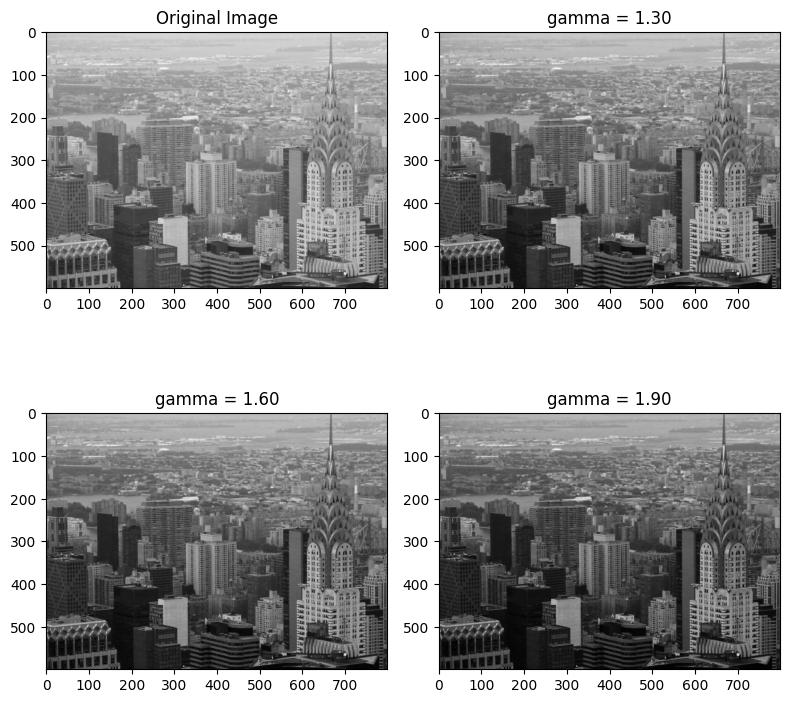

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/HE4.jpg")

# Gamma values for increasing contrast in a light image
gammas = [1.3, 1.6, 1.9]

# Plot original image
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img[:, :, ::-1])  # OpenCV uses BGR, convert to RGB for display
plt.title('Original Image')

# Apply gamma correction and normalization for each gamma value
for n, gamma in enumerate(gammas):
    # Convert image to float for calculations (avoid overflow)
    img2 = img.astype(np.float32)
    # Apply gamma correction
    img2 = img2 ** gamma

    # Normalize to range [0, 1] (prevents overflow during display)
    img2 = (img2 - img2.min()) / (img2.max() - img2.min())

    # Convert back to uint8 for image display
    img2 = np.clip(img2 * 255, 0, 255).astype(np.uint8)

    # Plot gamma-corrected image
    plt.subplot(2, 2, n + 2)
    plt.imshow(img2[:, :, ::-1])  # Convert back to BGR for display
    plt.title(f"gamma = {gamma:.2f}")  # Format title with 2 decimal places

plt.tight_layout()
plt.show()


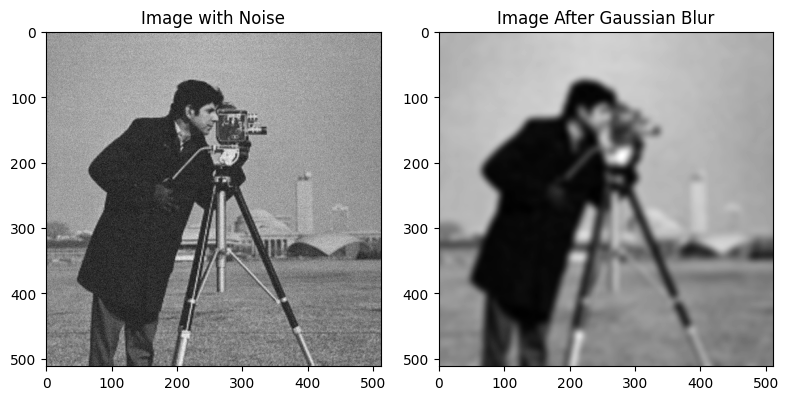

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Camera_man.bmp", cv2.IMREAD_GRAYSCALE)

# Define noise parameters
mean = 0
var = 200  # Adjust variance for desired noise level

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, np.sqrt(var), size=img.shape).astype(np.float32)

# Add noise to the image
noisy_img = img.astype(np.float32) + noise

# Convert image to float for calculations
I = noisy_img.astype(np.float32)

# Define Gaussian kernel parameters
sigma = 5
sz = 10

# Create meshgrid for kernel calculation
x, y = np.meshgrid(np.arange(-sz, sz + 1), np.arange(-sz, sz + 1))

# Calculate Gaussian filter components
exponent_component = -(x**2 + y**2) / (2 * sigma**2)
kernel = np.exp(exponent_component) / (2 * np.pi * sigma**2)

# Apply Gaussian blur using convolution (same padding)
output = cv2.filter2D(I, -1, kernel, borderType=cv2.BORDER_REPLICATE)  # Equivalent to conv2 with 'same' padding

# Convert back to uint8 for image display
output = np.clip(output, 0, 255).astype(np.uint8)

# Plot noisy and blurred images
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_img, cmap="gray")
plt.title("Image with Noise")
plt.subplot(1, 2, 2)
plt.imshow(output, cmap="gray")
plt.title("Image After Gaussian Blur")
plt.tight_layout()
plt.show()


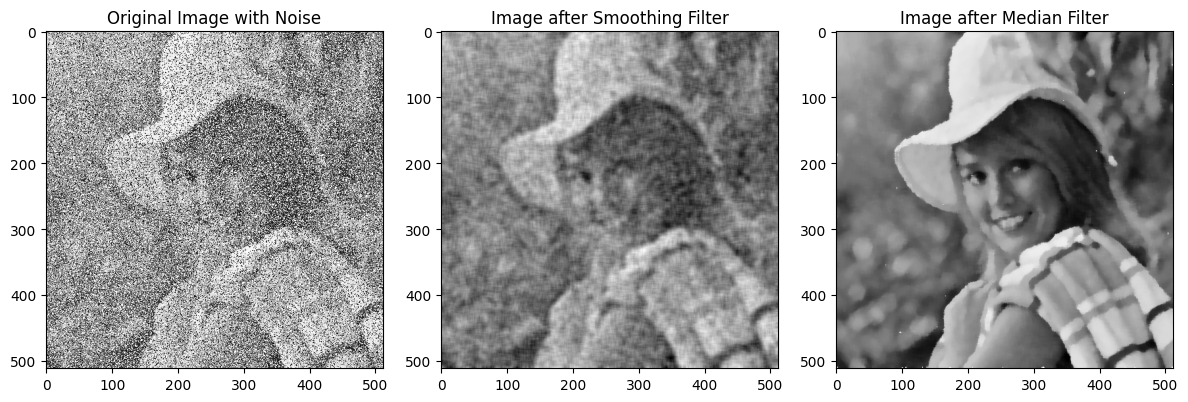

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Elaine.bmp", cv2.IMREAD_GRAYSCALE)

# Define salt-and-pepper noise probability
prob = 0.7

# Create a copy for noise addition
img_noisy = img.copy()

# Randomly select pixels for noise (salt or pepper)
num_pixels = np.random.randint(0, img.size * prob)
salt_pepper_pixels = np.random.randint(0, img.size, size=num_pixels)

# Apply salt noise (set to white)
img_noisy.flat[salt_pepper_pixels] = 255

# Apply pepper noise (set to black) with probability adjustment
pepper_prob = 1 - prob
pepper_pixels = np.random.choice(salt_pepper_pixels[salt_pepper_pixels != 255],
                                 size=int(num_pixels * pepper_prob))
img_noisy.flat[pepper_pixels] = 0

# Convert image to float for calculations
img2_float = img_noisy.astype(np.float32) / 255.0  # Normalize to [0, 1]

sz = 9  # Change sz to an odd number (e.g., 3, 5, 7, 9)

# Create averaging filter (ones matrix divided by area)
h = np.ones((sz, sz), dtype=np.float32) / (sz * sz)

# Apply smoothing filter using convolution (same padding)
img2_filtered = cv2.filter2D(img2_float, -1, h, borderType=cv2.BORDER_REPLICATE)

img3_filtered = cv2.medianBlur(img_noisy.astype(np.uint8), sz)

# Apply median filter
img3_filtered = cv2.medianBlur(img_noisy.astype(np.uint8), sz)  # No need for double conversion

# Plot original, smoothed, and median-filtered images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_noisy, cmap="gray")
plt.title('Original Image with Noise')
plt.subplot(1, 3, 2)
plt.imshow(img2_filtered, cmap="gray")
plt.title('Image after Smoothing Filter')
plt.subplot(1, 3, 3)
plt.imshow(img3_filtered, cmap="gray")
plt.title('Image after Median Filter')
plt.tight_layout()
plt.show()


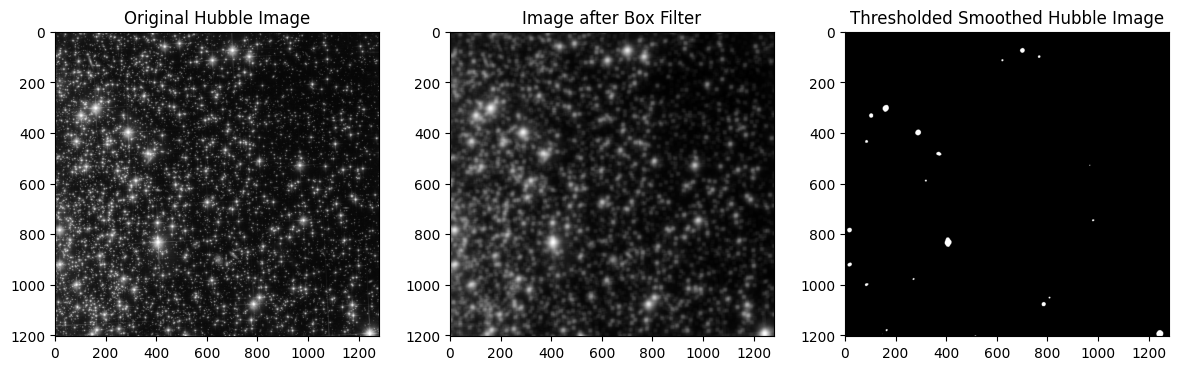

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Hubble.jpg")

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Define filter size
sz = 15

# Create box filter (ones matrix divided by area)
h = np.ones((sz, sz), dtype=np.float32) / (sz * sz)

# Apply box filter using convolution (same padding)
img_filtered = cv2.filter2D(img_gray, -1, h, borderType=cv2.BORDER_REPLICATE)

# Calculate threshold
threshold = 0.75 * np.max(img_filtered)

# Create binary image (thresholding)
img_thresh = img_filtered.copy()
img_thresh[img_thresh >= threshold] = 1
img_thresh[img_thresh < threshold] = 0

# Plot original, filtered, and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title('Original Hubble Image')
plt.subplot(1, 3, 2)
plt.imshow(img_filtered, cmap="gray")
plt.title('Image after Box Filter')
plt.subplot(1, 3, 3)
plt.imshow(img_thresh, cmap="gray")
plt.title('Thresholded Smoothed Hubble Image')
plt.tight_layout()
plt.show()


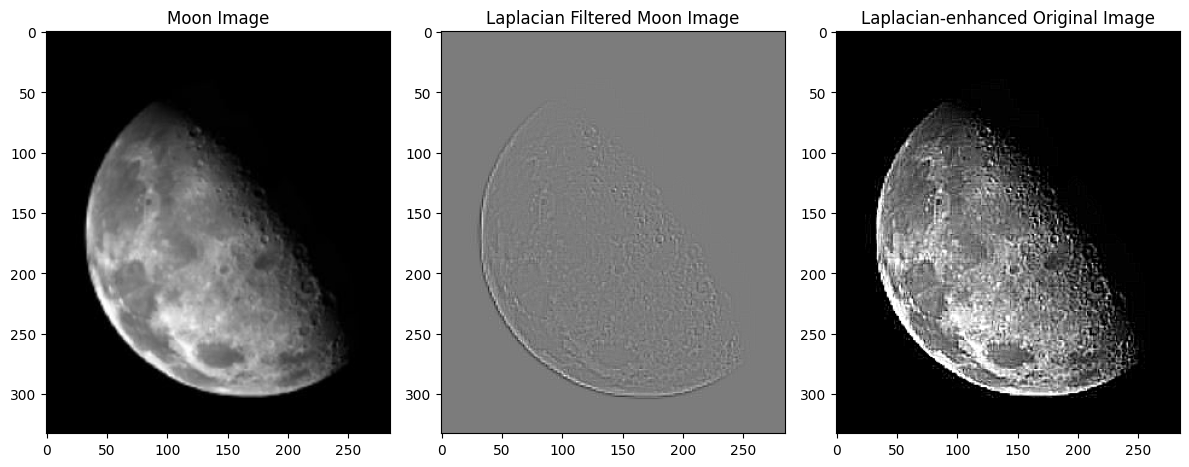

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/moon.jpg")

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Define Laplacian filter
laplacian = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)

# Apply Laplacian filter using convolution (same padding)
img_laplacian = cv2.filter2D(img_gray, -1, laplacian, borderType=cv2.BORDER_REPLICATE)

# Add Laplacian-filtered image back to the original image (with saturation)
img_enhanced = np.clip(img_gray + img_laplacian, 0, 1)  # Avoid overflow

# Plot original, filtered, scaled Laplacian, and enhanced images
plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title('Moon Image')

plt.subplot(1, 3, 2)
plt.imshow(img_laplacian, cmap="gray")
plt.title('Laplacian Filtered Moon Image')
plt.subplot(1, 3, 3)

plt.imshow(img_enhanced, cmap="gray")
plt.title('Laplacian-enhanced Original Image')
plt.tight_layout()
plt.show()
